In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [13]:
# Get the seed
import numpy as np
np.random.seed(2676)

In [14]:
# Get the data
all_data = pd.read_csv("input_data/model_ready_data.csv")

### Test/Train Split

In [15]:
# Get the y and x data in different variables
y_label = all_data["PRICE"]
X_data = all_data.drop(columns=["PRICE", "index", "TYPE", "LOCALITY", "SUBLOCALITY"])

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_data, y_label, test_size=0.3, random_state=43)

In [16]:
print(f"X Train Data Length = {len(train_X)} \t\t X Test Data Length = {len(test_X)} \n Y Train Data Length = {len(train_y)} \t\t Y Test Data Length = {len(test_y)}")

X Train Data Length = 3357 		 X Test Data Length = 1440 
 Y Train Data Length = 3357 		 Y Test Data Length = 1440


### Ridge Regression Model

In [17]:
# Set and fit model
# You can adjust the alpha parameter for regularization strength
ridge_model = Ridge(alpha=0.9) 
ridge_model.fit(train_X, train_y)

Ridge(alpha=0.9)

In [18]:
# Make predictions using the testing set
y_pred = ridge_model.predict(test_X)

### Model Prediction Statistics

In [19]:
# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Coefficient of Determination (R-squared)
r_squared = r2_score(test_y, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Define the number of folds (k)
# You can adjust this based on your preference
num_folds = 5  

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation for R-squared
cross_val_r_squared = cross_val_score(ridge_model, train_X, train_y, cv=kf, scoring='r2')

# Display the results
print(f'K-fold Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

Mean Squared Error (MSE): 9112473030276.633
Coefficient of Determination (R-squared): 0.4304802820360064
Mean Absolute Error (MAE): 1299378.7358171337
Root Mean Squared Error (RMSE): 3018687.302500316
K-fold Cross-validated R-squared: 0.29153939782774063


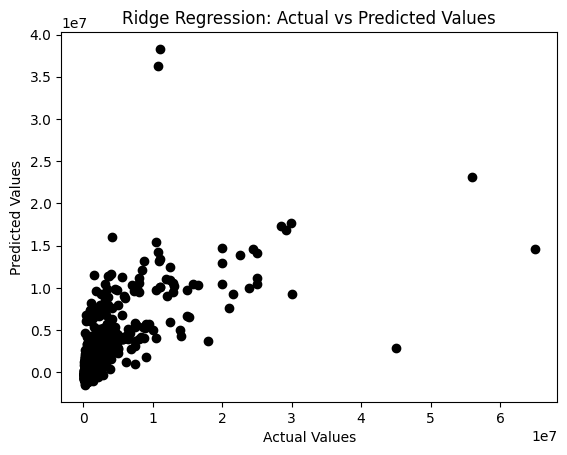

In [20]:
# Plot outputs
plt.scatter(test_y, y_pred, color="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs Predicted Values")
plt.savefig('output/ridge_reg.jpg')
plt.show()

In [21]:
coeff = pd.DataFrame(list(zip(ridge_model.feature_names_in_, ridge_model.coef_)), columns = ['Feature', 'Weight'])
coeff.sort_values('Weight')

,Feature,Weight
4,STATE,-3.865034e+06
46,SUBLOCALITY_is_Richmond County,-1.724110e+06
30,SUBLOCALITY_is_Bronx County,-1.329686e+06
44,SUBLOCALITY_is_Queens County,-1.130733e+06
39,SUBLOCALITY_is_Kings County,-9.921259e+05
11,TYPE_is_For sale,-9.093156e+05
16,TYPE_is_Multi-family home for sale,-7.045154e+05
9,TYPE_is_Condop for sale,-6.211647e+05
33,SUBLOCALITY_is_Coney Island,-6.205149e+05
7,TYPE_is_Coming Soon,-5.892149e+05


([<matplotlib.axis.XTick at 0x26505ad47c0>,
 [Text(1, 0, 'TYPE'), Text(2, 0, 'LOCALITY'), Text(3, 0, 'SUBLOCALITY')])

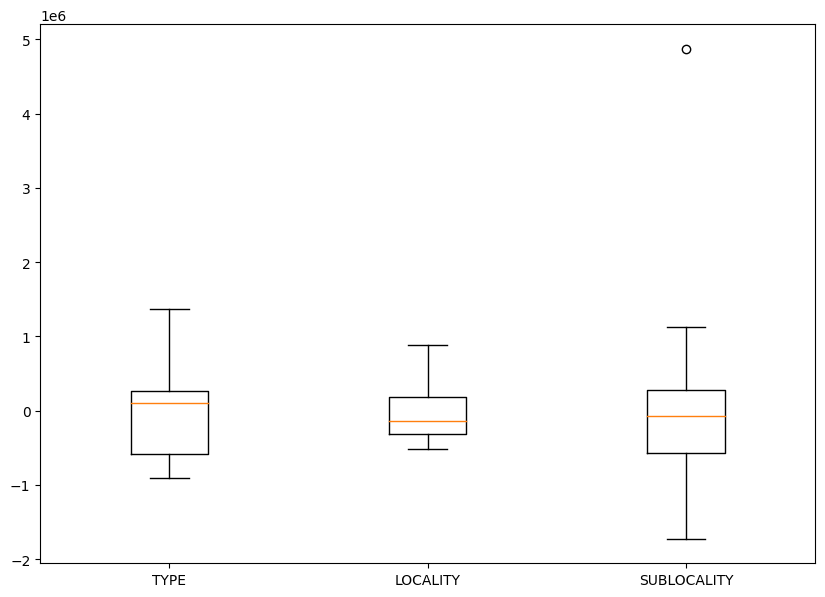

In [22]:
one_hot_attribute_list = ["TYPE", "LOCALITY", "SUBLOCALITY"]

features = coeff["Feature"]
weights = coeff["Weight"]

box_plot_dict = {
    "TYPE": [],
    "LOCALITY": [],
    "SUBLOCALITY": [],
}

for attribute in one_hot_attribute_list:
    for i in range(len(features)):
        feature = str(features[i])
        if feature.startswith(attribute):
            box_plot_dict[attribute].append(weights[i])

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([box_plot_dict["TYPE"], box_plot_dict["LOCALITY"], box_plot_dict["SUBLOCALITY"]])
plt.xticks(range(1, len(one_hot_attribute_list) + 1), one_hot_attribute_list)